In [1]:
# Import the necessary packages
# !pip install tensorflow, pydot, graphviz

import pandas as pd
import numpy as np 
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load the dataset
new_df= pd.read_csv('new_df.csv')

# Define X and y
X_ml = new_df.select_dtypes(include='number').drop(columns='Life_expectancy')
y_ml = new_df['Life_expectancy']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_ml, y_ml, test_size=0.2, random_state=42)

# Scale it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Define the model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile it
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4765.3267 - mae: 68.5922 - val_loss: 4155.7251 - val_mae: 63.9642
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3440.6157 - mae: 57.4748 - val_loss: 1275.7755 - val_mae: 32.9584
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 841.0427 - mae: 24.7837 - val_loss: 313.1457 - val_mae: 14.6453
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 348.9648 - mae: 15.2442 - val_loss: 215.2652 - val_mae: 11.8611
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 234.3773 - mae: 12.4096 - val_loss: 193.5209 - val_mae: 11.2913
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 239.9961 - mae: 12.3607 - val_loss: 168.6686 - val_mae: 10.4375
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 225.8397 - mae: 12.2119 - val_loss: 156.4225 - val_mae: 9.9299
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 188.7144 - mae: 10.9845 - val_loss: 141.1378 - val_mae: 9.4787
Epoch 9/200
2

In [4]:
## Evaluating the model

# Predict on test set
nn_preds = model.predict(X_test_scaled).flatten()

# Evaluate
print("***** DEEP LEARNING MODEL *****")
print("R²:", r2_score(y_test, nn_preds))
print("MAE:", mean_absolute_error(y_test, nn_preds))
print("RMSE:", root_mean_squared_error(y_test, nn_preds))

# Model Summary
model.summary()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
***** DEEP LEARNING MODEL *****
R²: 0.8433052468070521
MAE: 2.2537335388420163
RMSE: 3.0511835867576145


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,789 (151.52 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,860 (101.02 KB)

In [5]:
# Visualisation of the network of the first model

import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Training Loss', color='royalblue', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='darkorange', linewidth=2)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss (MSE)', fontsize=12)
    plt.title('First model network', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

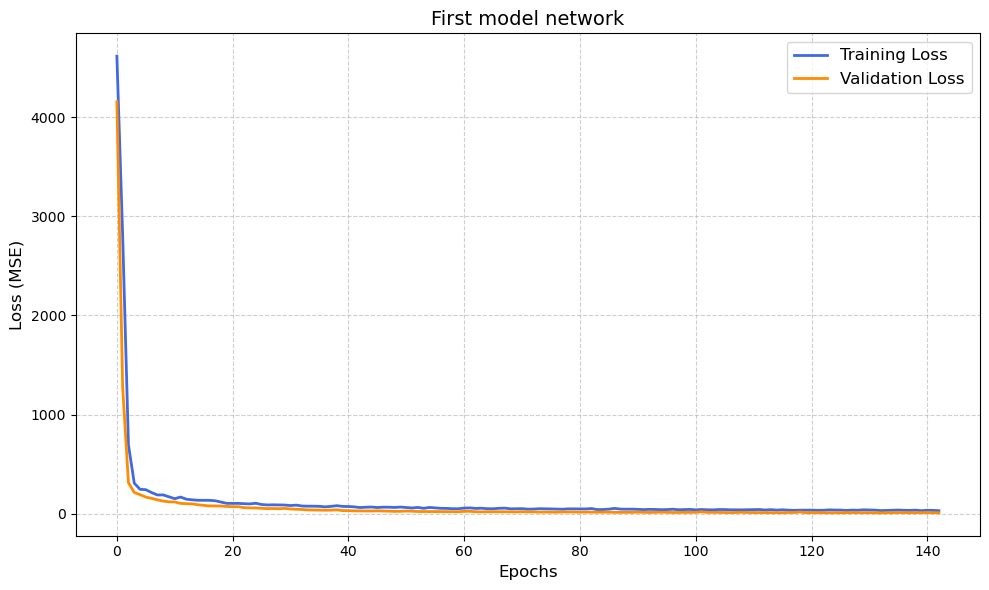

In [6]:
plot_loss(history)      

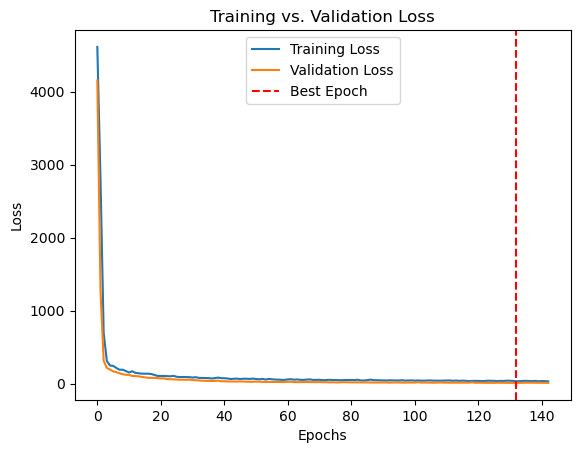

In [7]:
# Early stopping working plot

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(np.argmin(history.history['val_loss']), color='red', linestyle='--', label='Best Epoch')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Save and show
plt.savefig('plots/Training_vs_Validation_loss.png')
plt.show()

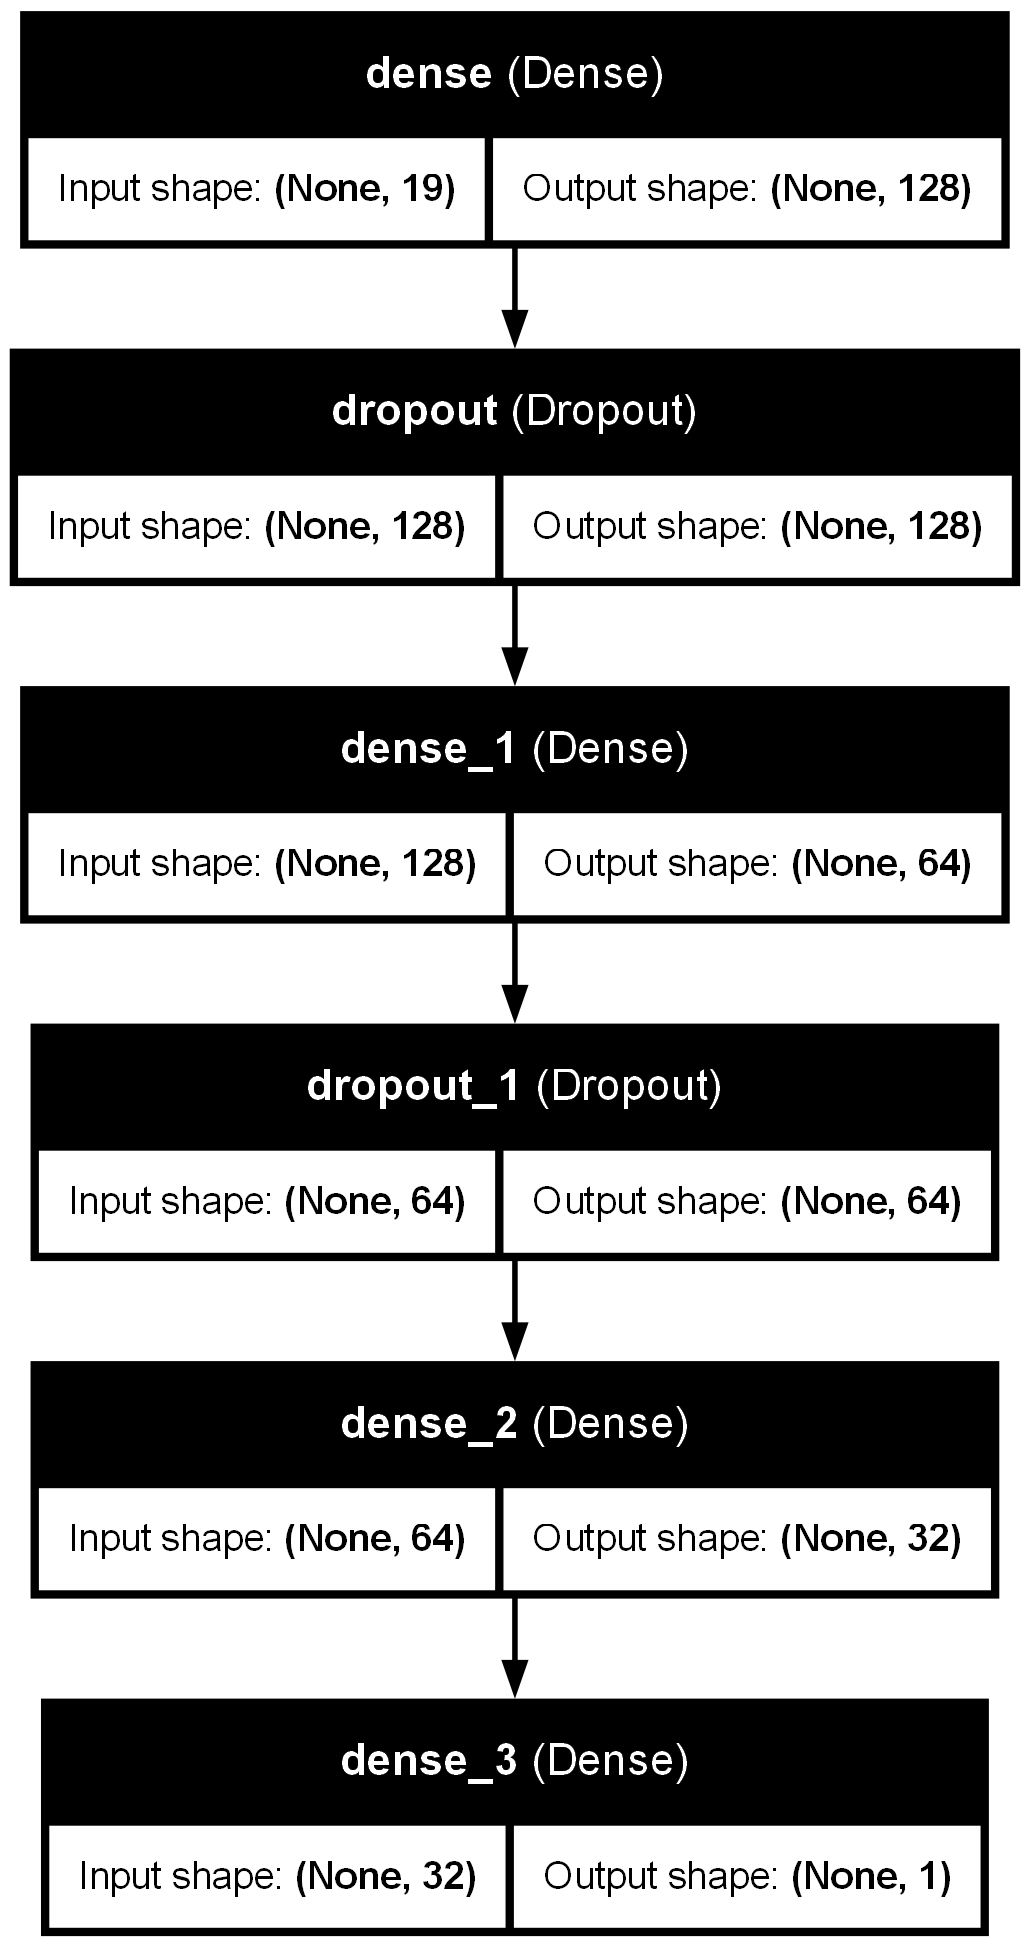

In [8]:
# Plot the model

from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

                                        ARCHITECTURE FEATURES
- Input Features: 17
- Hidden Layers: 3
- Neurons per layer: 128 → 64 → 32
- Activation function: ReLu (hidden) and Linear (output)
- Dropout: 0.3 & 0.2
- Total trainable Params: 12,929

In [9]:
# Save the neural net

model.save("life_expectancy_model.h5")

In [10]:
# Save the scaler

import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [11]:
# Model Prediction script

from tensorflow.keras.models import load_model
import joblib
import numpy as np

# Load the model and scaler
model = load_model('life_expectancy_model.keras')
scaler = joblib.load('scaler.pkl')

# Example: make prediction from new input
def predict_life_expectancy(input_data):
    """
    input_data: list or numpy array with shape (1, num_features)
    """
    input_scaled = scaler.transform(np.array(input_data).reshape(1, -1))
    prediction = model.predict(input_scaled)
    return prediction[0][0]